# Import Data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style(style='whitegrid')
import matplotlib.pyplot as plt

In [8]:
#sets the default options for viewing pandas dataframes
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)
#pd.set_option('display.width', 100)
pd.set_option('display.max_info_columns', 50)

In [9]:
path = '/Users/dmitriykats/Documents/SpringBoard/Springboard/Capstone2/true_review/data/'

In [10]:
df = pd.read_csv(f'{path}/raw/restaurant_reviews.csv', parse_dates=['date'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df.columns

Index(['user_id', 'business_id', 'rev_stars', 'date', 'text', 'useful',
       'funny', 'cool', 'bus_id', 'name', 'neighborhood', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'bus_stars',
       'review_count', 'is_open', 'categories'],
      dtype='object')

In [12]:
#drop the bus_id columns, it's a duplicated of business_id
df = df.drop(columns='bus_id')

In [13]:
df['weekday'] = df.date.apply(lambda x: x.weekday())

In [14]:
#add a new colomn which calculates the number of characters in a given review
df['text length'] = df['text'].apply(len)

In [15]:
#add a year column
df['year'] = df.date.apply(lambda x: x.year)

### Looking at Checkins

In [10]:
df_check = pd.read_csv(f'{path}/external/yelp_checkin.csv')

In [11]:
df_check.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


### Users and their friends

In [27]:
df_friends = pd.read_csv(f'{path}/external/yelp_user.csv', parse_dates=['yelping_since'])

In [28]:
df_friends.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,2.00,0,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,3.45,0,0,0,0,0,0,0,0,0,1,0


In [29]:
df_friends.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326100 entries, 0 to 1326099
Data columns (total 22 columns):
user_id               1326100 non-null object
name                  1325603 non-null object
review_count          1326100 non-null int64
yelping_since         1326100 non-null datetime64[ns]
friends               1326100 non-null object
useful                1326100 non-null int64
funny                 1326100 non-null int64
cool                  1326100 non-null int64
fans                  1326100 non-null int64
elite                 1326100 non-null object
average_stars         1326100 non-null float64
compliment_hot        1326100 non-null int64
compliment_more       1326100 non-null int64
compliment_profile    1326100 non-null int64
compliment_cute       1326100 non-null int64
compliment_list       1326100 non-null int64
compliment_note       1326100 non-null int64
compliment_plain      1326100 non-null int64
compliment_cool       1326100 non-null int64
compliment_funny 

In [30]:
#filter the friends dataframe to only include users with friends
df_friends['friends'] = df_friends.friends.apply(lambda x: np.nan if x == 'None' else x)
df_friends = df_friends.dropna()

In [32]:
df_friends.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
17,h5ERTYn2vQ1QbjTZvfWPaA,Bobby,3,2017-01-07,"jYiZnueCr7gVq9T34xoa7g, yFLXGdY6rpHt7hRiwEFMag...",0,0,0,0,None,3.33,0,0,0,0,0,0,0,0,0,0,0
18,jYnkJR3T8yCERXywoVhWYA,Hugo,48,2010-07-06,"hkXekeW_Jj6mIy8r8N7r1Q, dQDpV-VUtwYGqHznuRV-yw...",15,6,2,3,None,3.73,2,0,0,0,0,1,1,1,1,2,0
44,fV8Yr0c5tFQTQ2SRRJHXHw,Michelle,50,2007-08-22,"HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A...",43,12,5,1,2009,3.96,2,4,0,0,0,9,7,7,7,4,0
74,aw973Pm1nrTbRjP4zY9B9g,Kenny,762,2008-09-23,"Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...",174,151,67,27,"2014, 2016, 2013, 2015, 2010, 2012, 2011",3.60,20,4,2,7,0,16,52,47,47,14,1


In [120]:
#Further filter the dataframe to only include users with over 200 reviews
df_power_user = df_friends[df_friends.review_count > 200]

In [34]:
df_power_user['num_friends'] = df_power_user.friends.apply(lambda x: x.count(',') + 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_power_user['year'] = df_power_user.yelping_since.apply(lambda x: x.year)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_power_user.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,num_friends,year
74,aw973Pm1nrTbRjP4zY9B9g,Kenny,762,2008-09-23,"Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...",174,151,67,27,"2014, 2016, 2013, 2015, 2010, 2012, 2011",3.60,20,4,2,7,0,16,52,47,47,14,1,332,2008
212,wm97KC6G0resSDXTmNIMKw,Dwain,1262,2012-06-08,"j7W6t1Bjb3H1vCTtk3wiCA, Tnl7W-J1JvlU1sDA3C5M3g...",319,295,296,57,None,4.15,15,14,5,4,2,37,161,94,94,30,42,1153,2012
414,snDjs1hdh7JOWv4jjbXPDw,Michael,447,2008-11-19,"uIjj7EIVBU4kGNgmKPO02A, kroQYWSj-BhIEXT4VwLRHA...",35,36,7,13,"2015, 2013, 2014, 2017, 2016",3.86,23,3,2,0,0,11,25,22,22,17,3,201,2008
544,bBRPy8zUvNc0NGbGmkjrZg,Jan,462,2009-03-30,"T78RIzZ3VPQ9C8njU_VIuA, gxSDEZYcRn_uFWZzQCDKrA...",2166,1853,1681,95,"2012, 2011, 2013, 2010",4.00,599,138,151,120,92,221,466,764,764,279,197,1878,2009
655,37Hc8hr3cw0iHLoPzLK6Ow,Christine,496,2008-03-03,"duEhqH-mtI4qIyIh3NCn9A, Sndz5pnHkoCRsxS7vRkMNw...",24,38,24,46,"2011, 2010, 2009, 2012",3.72,248,19,32,16,15,76,131,310,310,98,44,531,2008


# NLP

## Using NetworkX, find the restaurants that have the most number of shared users.

In [14]:
import networkx as nx

In [15]:
G = nx.Graph()

In [16]:
#adding the nodes for users and businesses
G.add_nodes_from(pit['user_id'], bipartite='user_id')
G.add_nodes_from(pit['business_id'], bipartite='business_id')
#adding edges between the users and businesses
G.add_edges_from(zip(pit['user_id'], pit['business_id']))

#Gather nodes from all partitions
cust_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'user_id']
rest_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'business_id']

In [17]:
#create the connectivity matrix
mat = nx.bipartite.biadjacency_matrix(G,
                                     row_order=cust_nodes,
                                     column_order=rest_nodes)

In [18]:
from nxviz import CircosPlot

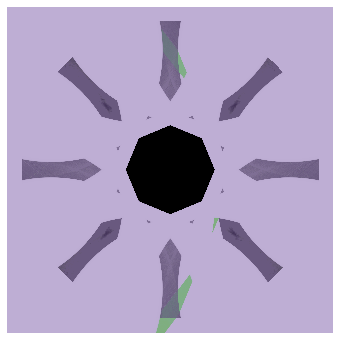

In [20]:
c = CircosPlot(G, node_grouping='bipartite', node_color='bipartite')
c.draw()
plt.show()

In [22]:
plt.savefig('phoenix_network.png')

<Figure size 720x432 with 0 Axes>

In [21]:
adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool)

In [26]:
adjacency_matrix.sum()

244994

In [18]:
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a networkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(10, 10)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")

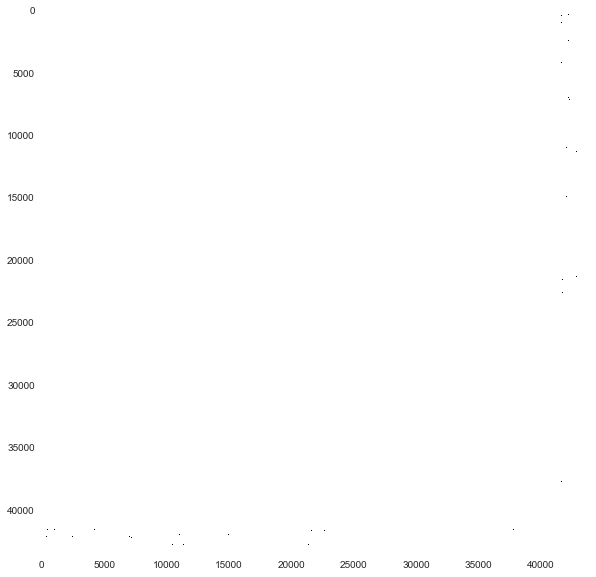

In [19]:
draw_adjacency_matrix(G)

In [120]:
#multiply the original matrix by the the transposed matrix to develop a business connectivity matrix
con_matrix = mat @ mat.T 

In [121]:
#set the diagonal to zero and convert to coordinate matrix format
con_matrix.setdiag(0)
business_coo = con_matrix.tocoo()

In [ ]:
#find the businesses who shared the most number of users 

In [47]:
count = list(con_matrix.sum(axis=0))

In [50]:
print(count[0][0])

[[  423  6273 11523 ...   103    50     5]]


In [54]:
#use degree centrality to figure out the customer importance metric
#the higher values represent more connections to restaurants
nx.bipartite.degree_centrality(G, cust_nodes)

{'hjx3BT4QXbR8H5js251_Ow': 0.00019634792852935403,
 'KUvyfWBnBFQkS8CFnGG4xA': 0.00019634792852935403,
 'w53pb8dfRcoV6t3RSw1QAQ': 0.00039269585705870805,
 'pvmzmPs-uEWjObcJuUaWcw': 0.00019634792852935403,
 'eLVIfBOPwEw5wpcHMfW3MQ': 0.0005890437855880621,
 'd8yfvMid_qgJ2fAO8W9UFw': 0.00019634792852935403,
 'ZMqKGYb_oJpDz3HBT-nh-g': 0.00039269585705870805,
 'YOImIB91eptt0y2WVjiHqQ': 0.0007853917141174161,
 'PPT8xr_ryVlQupjbPb9Ldg': 0.00019634792852935403,
 'Z1OJOcwsWppWFOKWFusa4A': 0.00019634792852935403,
 'A1N9-N9wBnjX44Za-9AJQg': 0.0005890437855880621,
 '9vtFHK7QcLDICLLzGV90WQ': 0.00019634792852935403,
 'WrN3_iH0mrt0t1E-dETwEw': 0.0005890437855880621,
 'DhMvxB9apRacIrBrqMfc9Q': 0.00019634792852935403,
 'wM6ys83Ec1ccdkeWVI0hHQ': 0.0013744354997054782,
 'juNeYhO3yGQnTzZJDxrL3Q': 0.00019634792852935403,
 '1oSb1_MP9RR77F6Fijfftg': 0.00019634792852935403,
 'oEwXlQ0_W3AlE9vKm2ZMRA': 0.00019634792852935403,
 'r_9uZ0eE3A2mPEtn1tzKig': 0.00019634792852935403,
 'kf3SH4T-cDIvWnMQu3q_ng': 0.0001963

In [12]:
test = pd.DataFrame(columns=['users','restaurants'])

In [36]:
test.loc[5] = ['user3', 'rest3']

In [37]:
test.groupby(['restaurants', 'users']).size().unstack('restaurants')

restaurants,rest1,rest2,rest3
users,,,
user1,1.0,1.0,NaN
user2,1.0,1.0,NaN
user3,1.0,NaN,1.0


In [38]:
test.head(20)

,users,restaurants
0,user1,rest1
1,user1,rest2
2,user2,rest1
3,user2,rest2
4,user3,rest1
5,user3,rest3


In [26]:
U = nx.Graph()
U.add_nodes_from(test['users'], bipartite='users')
U.add_nodes_from(test['restaurants'], bipartite='restaurants')
U.add_edges_from(zip(test['users'],test['restaurants']))
#Gather nodes from all partitions
testC_nodes = [n for n in U.nodes() if U.node[n]['bipartite'] == 'users']
testR_nodes = [n for n in U.nodes() if U.node[n]['bipartite'] == 'restaurants']
test_mat = nx.bipartite.biadjacency_matrix(U,
                                     row_order=testC_nodes,
                                     column_order=testR_nodes)

In [31]:
#multiply the original matrix by the the transposed matrix to develop a business connectivity matrix
test_con_matrix =  test_mat.T @ test_mat

In [32]:
test_con_matrix.setdiag(0)
test_business_coo = test_con_matrix.tocoo()

In [33]:
count = list(test_con_matrix.sum(axis=0))

In [34]:
count

[matrix([[2, 2]])]